In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

from toolbox import load_mnist

2024-09-25 16:55:51.178100: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-25 16:55:51.846495: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### __1. Import and data pre-processing:__ 

In [2]:
# import MNIST data:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_mnist(net="cnn")

x-train:(48000, 28, 28, 1), x-val:(12000, 28, 28, 1), x-test:(10000, 28, 28, 1)
y-train:(48000, 10), y-val:(12000, 10), y-test:(10000, 10)


### __2. Neural network modeling:__
<font size=3>
    
To join conv block with dense block use a [reshape layer](https://keras.io/api/layers/reshaping_layers/).

In [3]:
In = layers.Input((x_train.shape[1:]))

x = layers.Conv2D(32, kernel_size=3, activation="relu")(In)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Flatten()(x)

x = layers.Dense(400, activation="relu")(x)

Out = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=In, outputs=Out)

model.summary()

2024-09-25 16:55:53.729694: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 400)            │       640,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 663,226 (2.53 MB)

 Trainable params: 663,226 (2.53 MB)

 Non-trainable params: 0 (0.00 B)

### __3. Model compilation:__

In [4]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=['acc'])

### __4. Train and validation__

### __5. Final training__

In [ ]:
report = model.fit(x=np.concatenate([x_train, x_val]), 
                   y=np.concatenate([y_train, y_val]), 
                   batch_size=50, epochs=30)

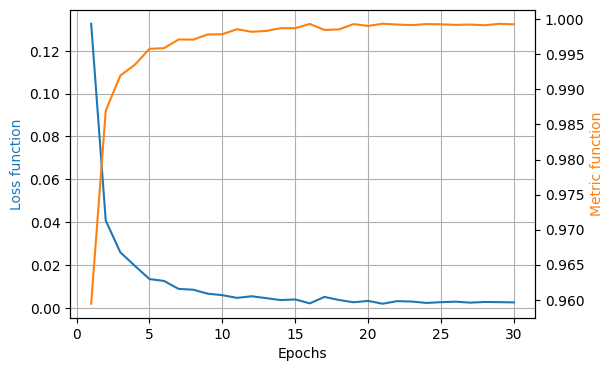

In [6]:
loss = report.history['loss']
acc = report.history['acc']

epochs = np.linspace(1, len(loss), len(loss))

fig, ax1 = plt.subplots(figsize=(6,4))
ax2 = ax1.twinx()

ax1.plot(epochs, loss, c='#1f77b4', label="loss")
ax2.plot(epochs, acc, c='#ff7f0e', label="acc")

ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss function", c='#1f77b4')
ax2.set_ylabel("Metric function", c='#ff7f0e')

ax1.grid()
plt.show()

### __6. Test evaluation__:

In [7]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9932 - loss: 0.0464


[0.03955535963177681, 0.993399977684021]

In [8]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [9]:
print("y-test =", y_test[0])
print("y-pred =", y_pred[0])

y-test = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
y-pred = [9.3954943e-38 8.7773587e-24 1.2066520e-25 9.9999994e-01 1.8652289e-35
 2.4085524e-27 1.5291702e-36 2.2953182e-30 7.4127366e-24 4.7249424e-32]


In [10]:
n = np.random.randint(low=0, high=x_test.shape[0], size=10)

for y1, y2 in zip(y_test[n], y_pred[n]):
    
    l1 = np.argmax(y1)
    l2 = np.argmax(y2)
    
    print(f"y-test = {l1}, y-pred = {l2}: {l1 == l2}")
    

y-test = 3, y-pred = 3: True
y-test = 4, y-pred = 4: True
y-test = 2, y-pred = 2: True
y-test = 3, y-pred = 3: True
y-test = 3, y-pred = 3: True
y-test = 1, y-pred = 1: True
y-test = 5, y-pred = 5: True
y-test = 9, y-pred = 9: True
y-test = 7, y-pred = 7: True
y-test = 6, y-pred = 6: True


### __7. Saving the model__:

<font size=3>
    
For model __loading__, see [2.2-notebook](2.2-notebook.ipynb).